### Introduction 

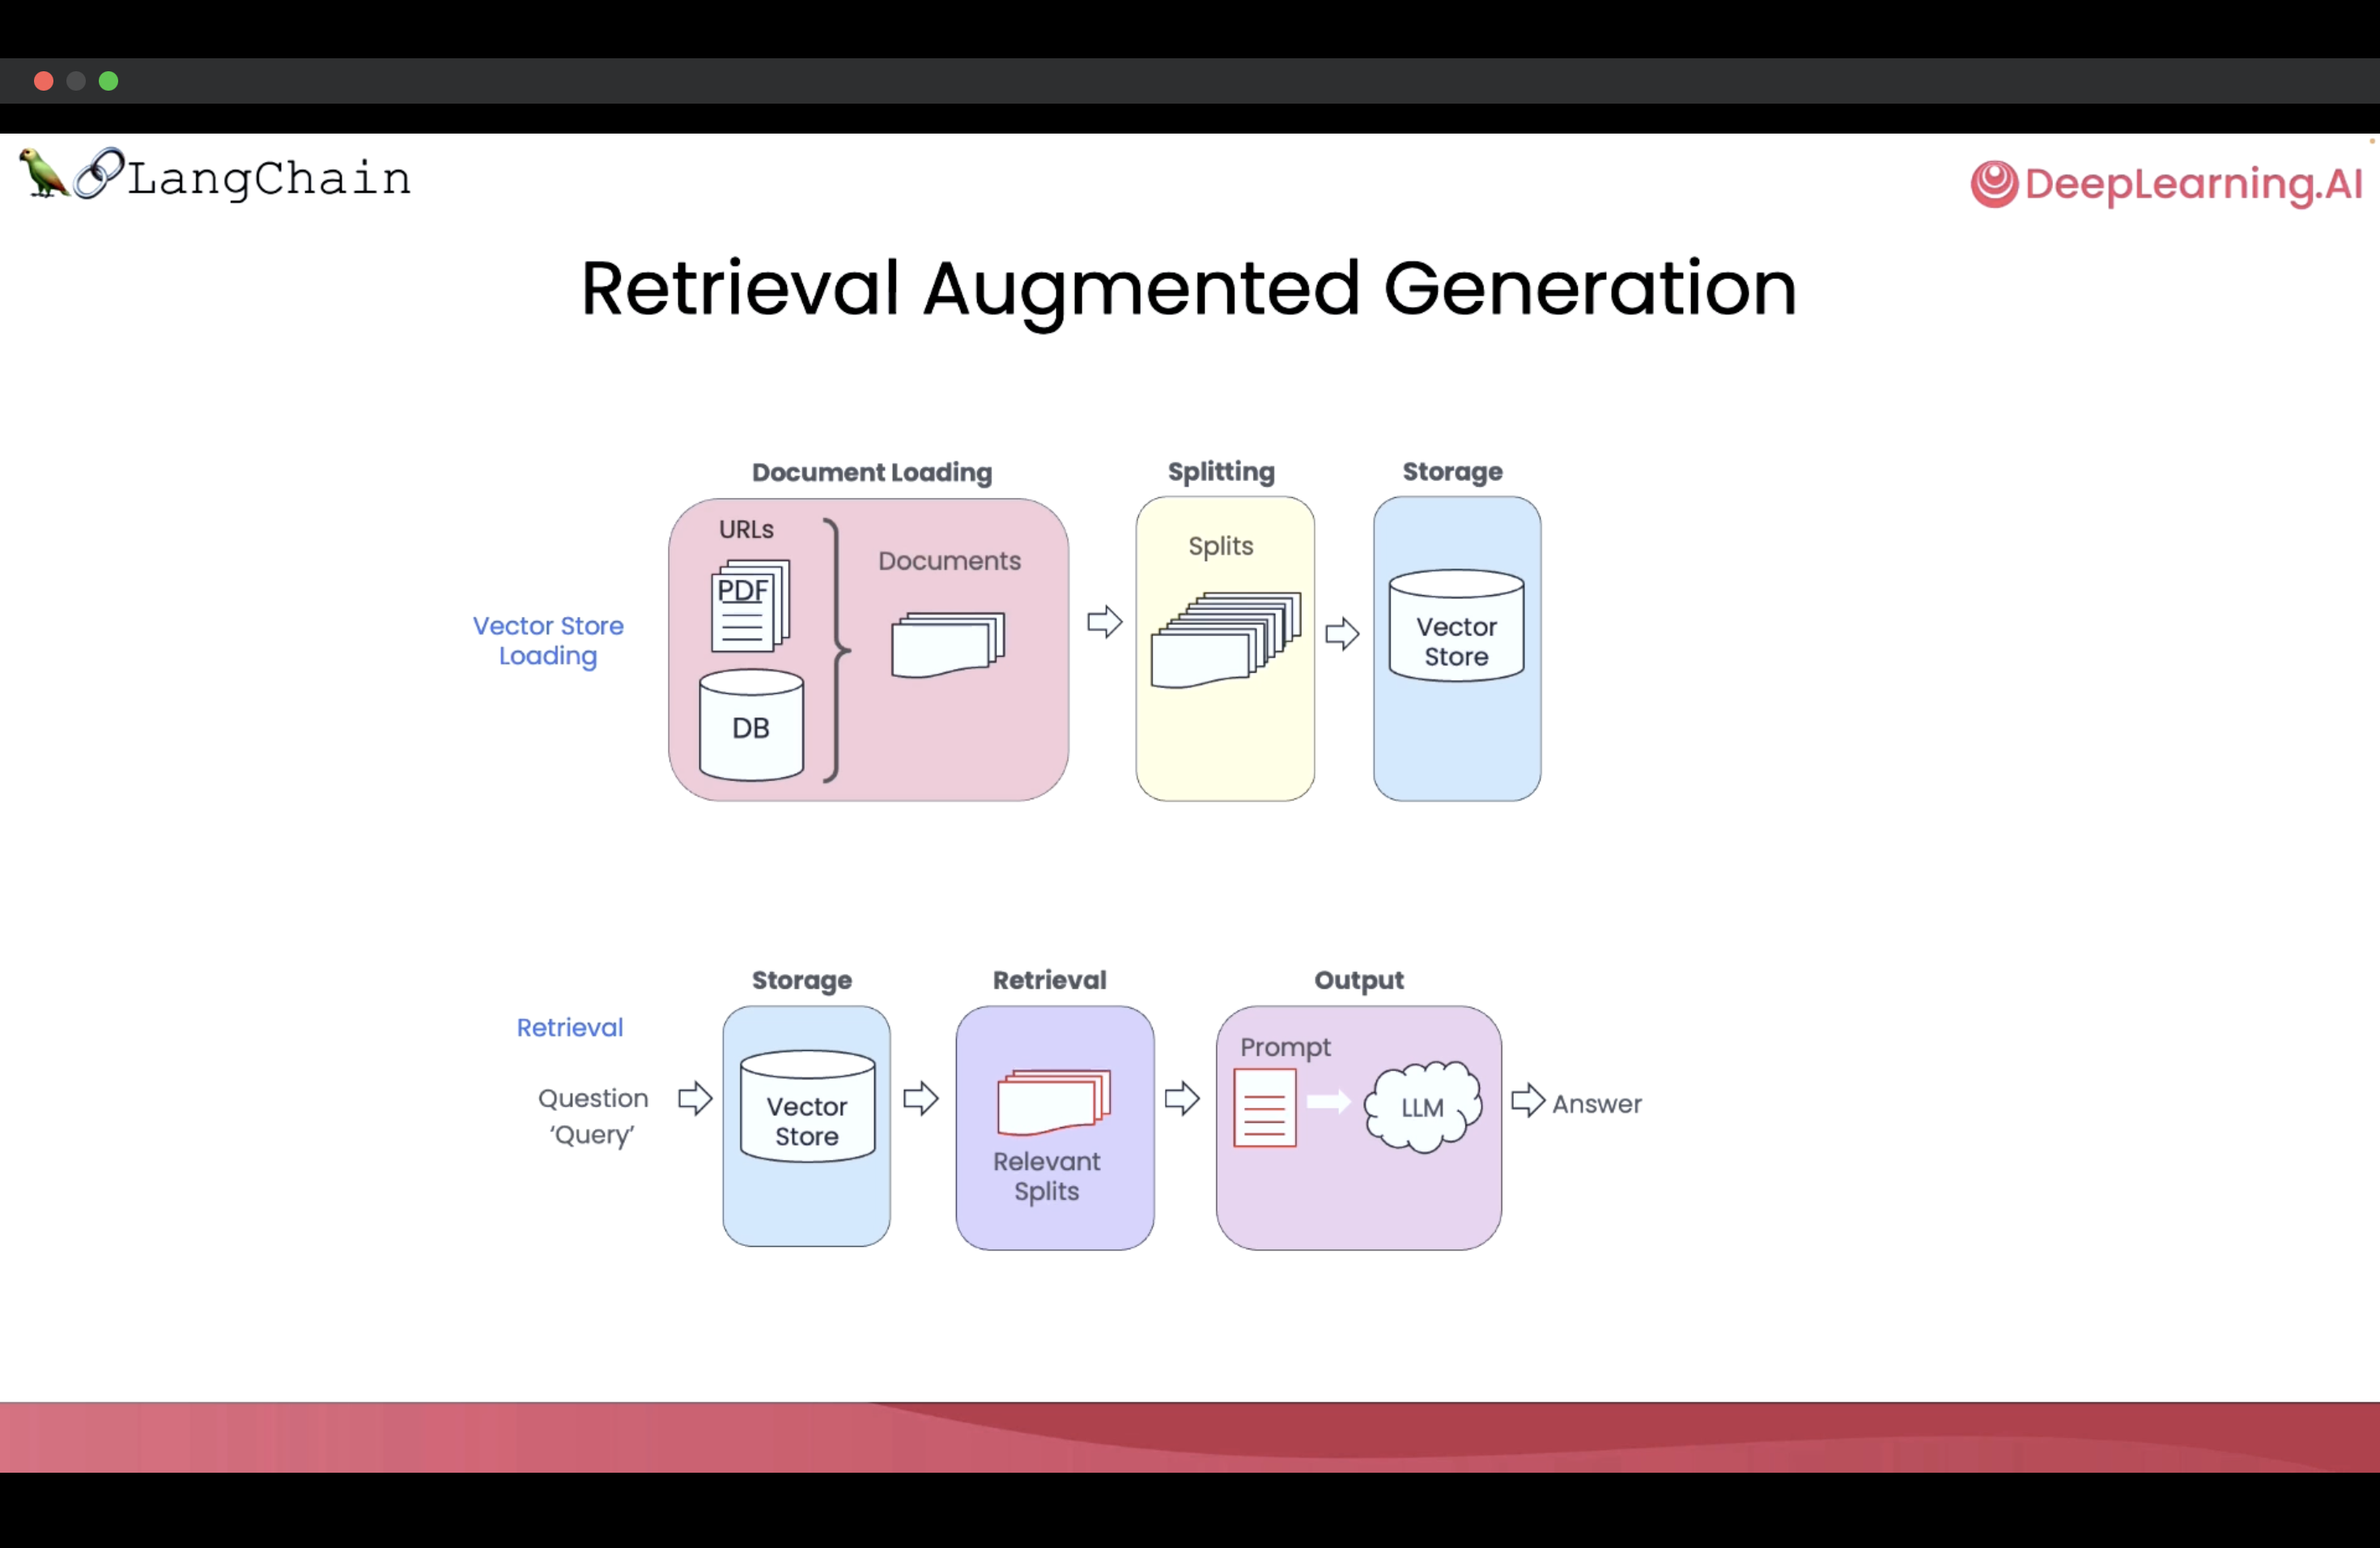

### Document Loading 

Langchain Document Loaders - 80 Different Types 

Purpose of using this Document Loader is to extract data from different sources and convert it into standard Document Object. Which has content and associated metadata

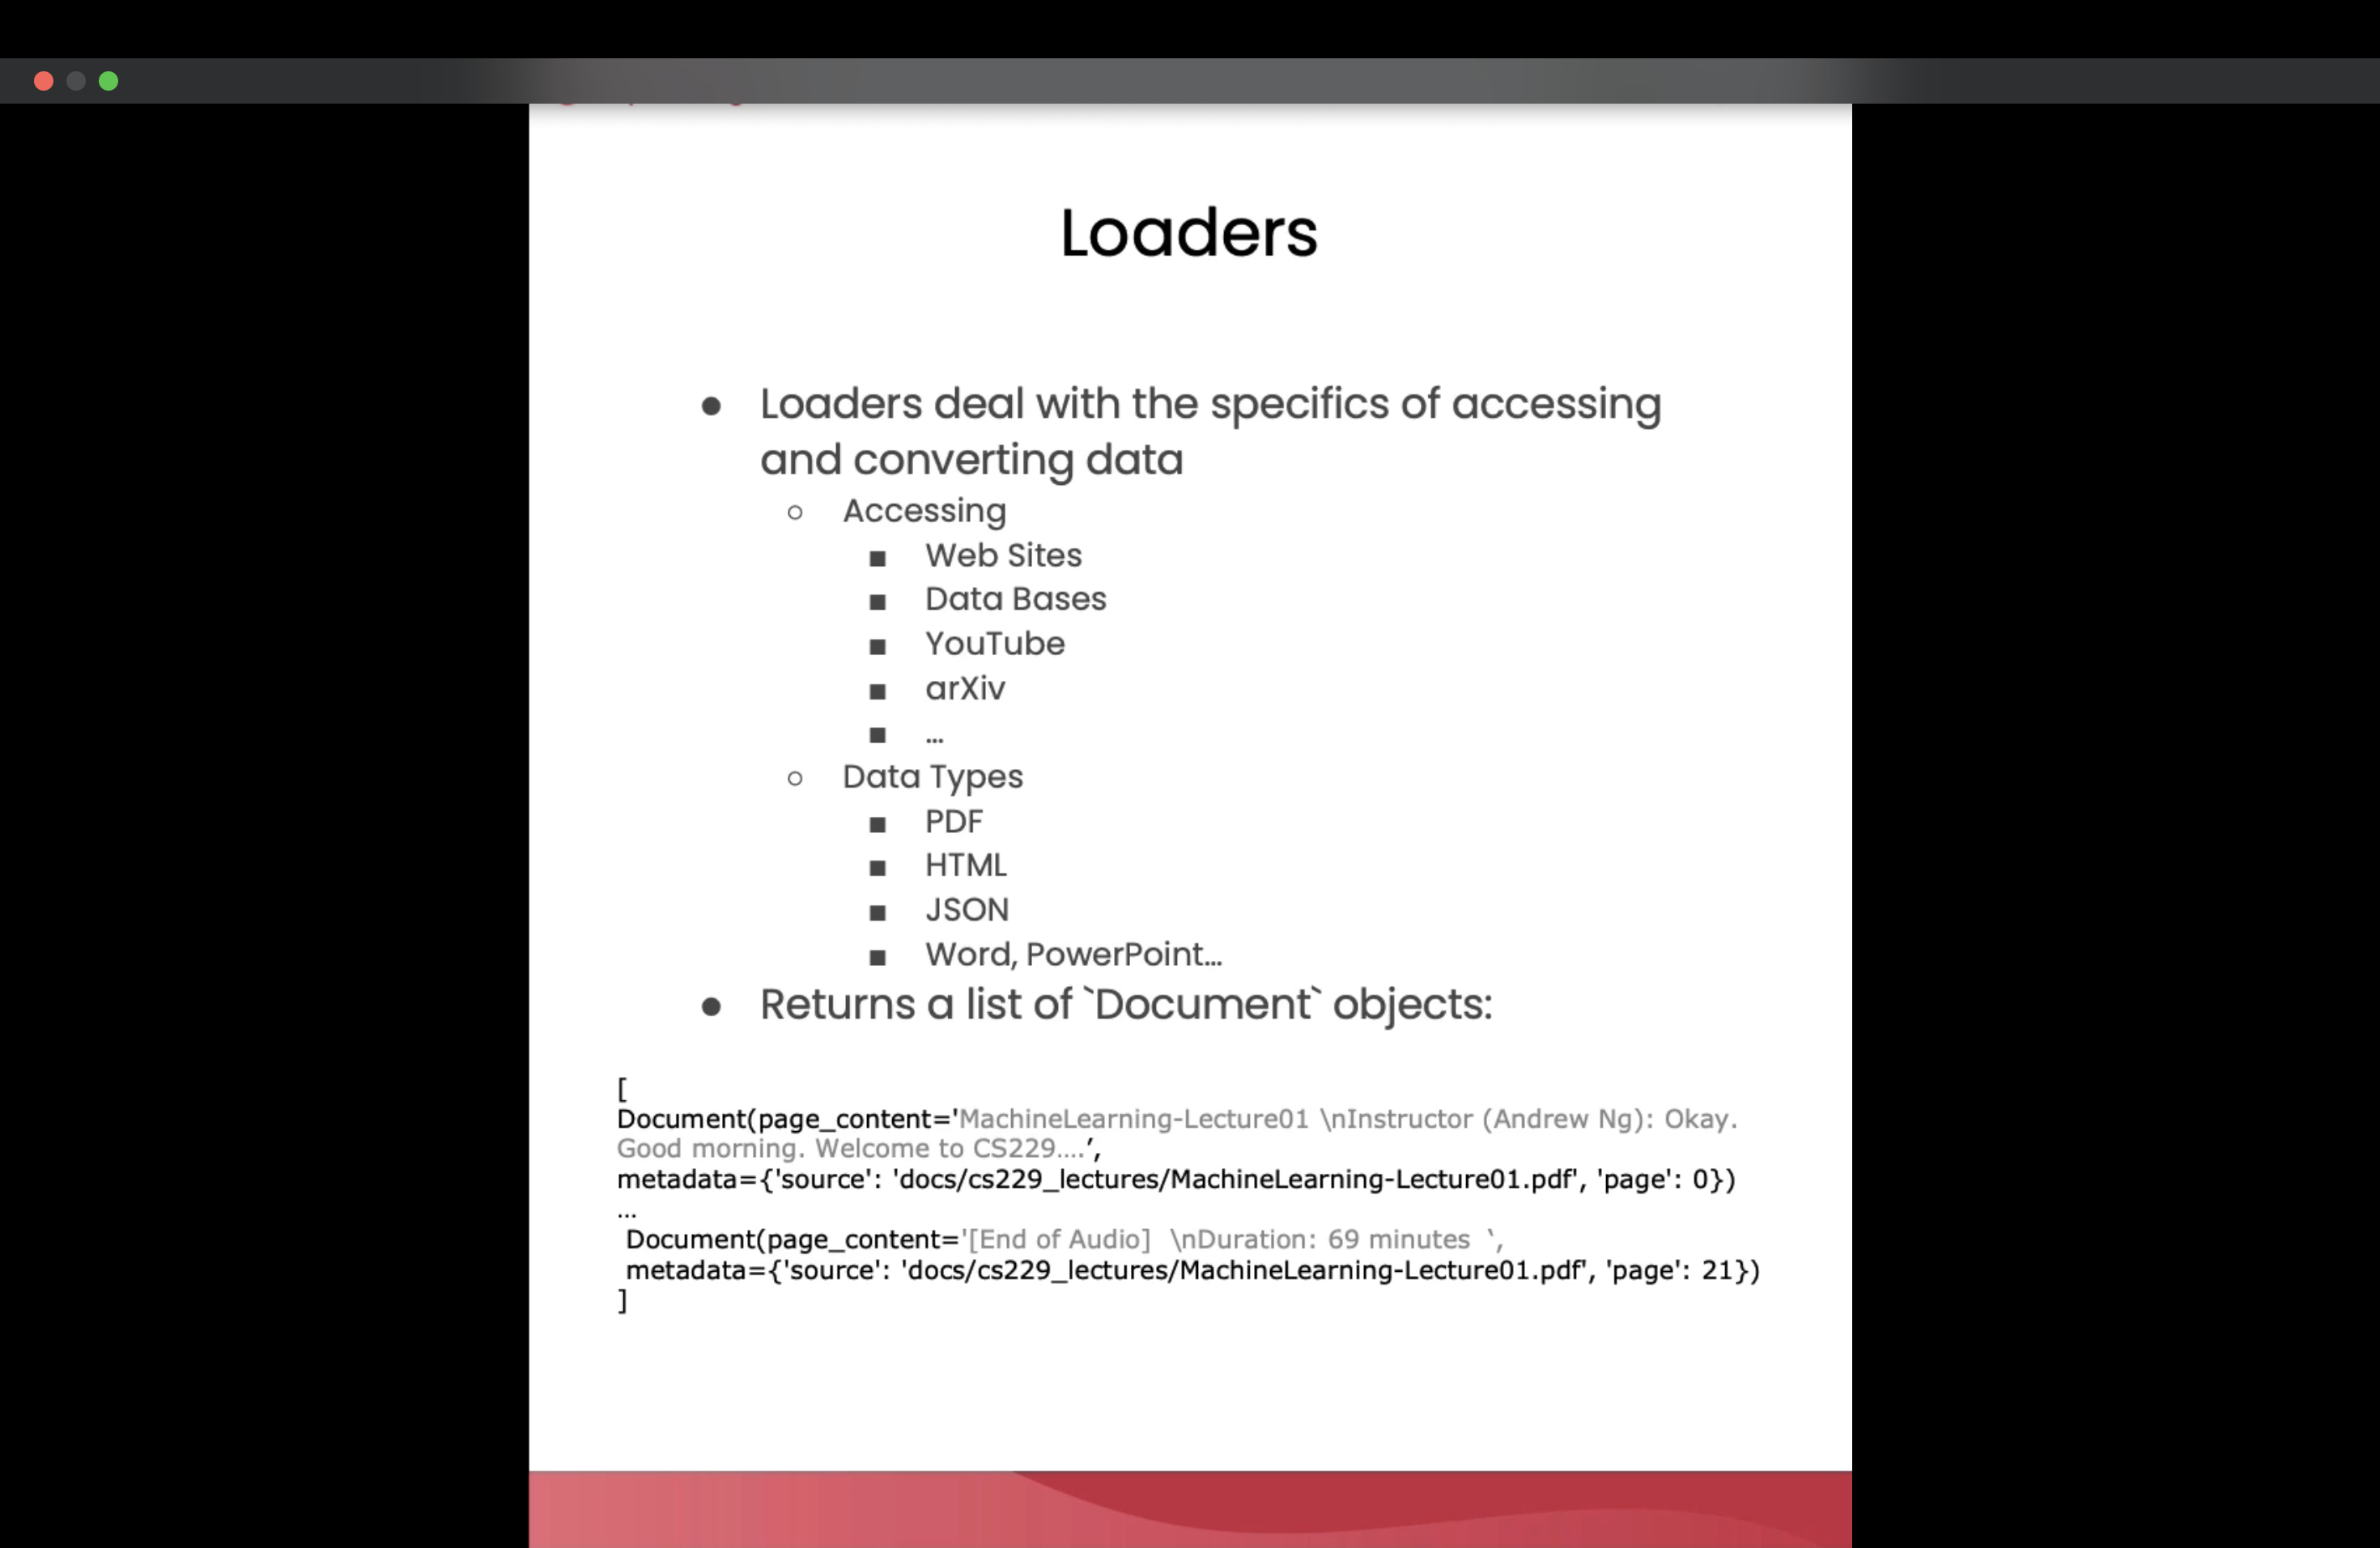

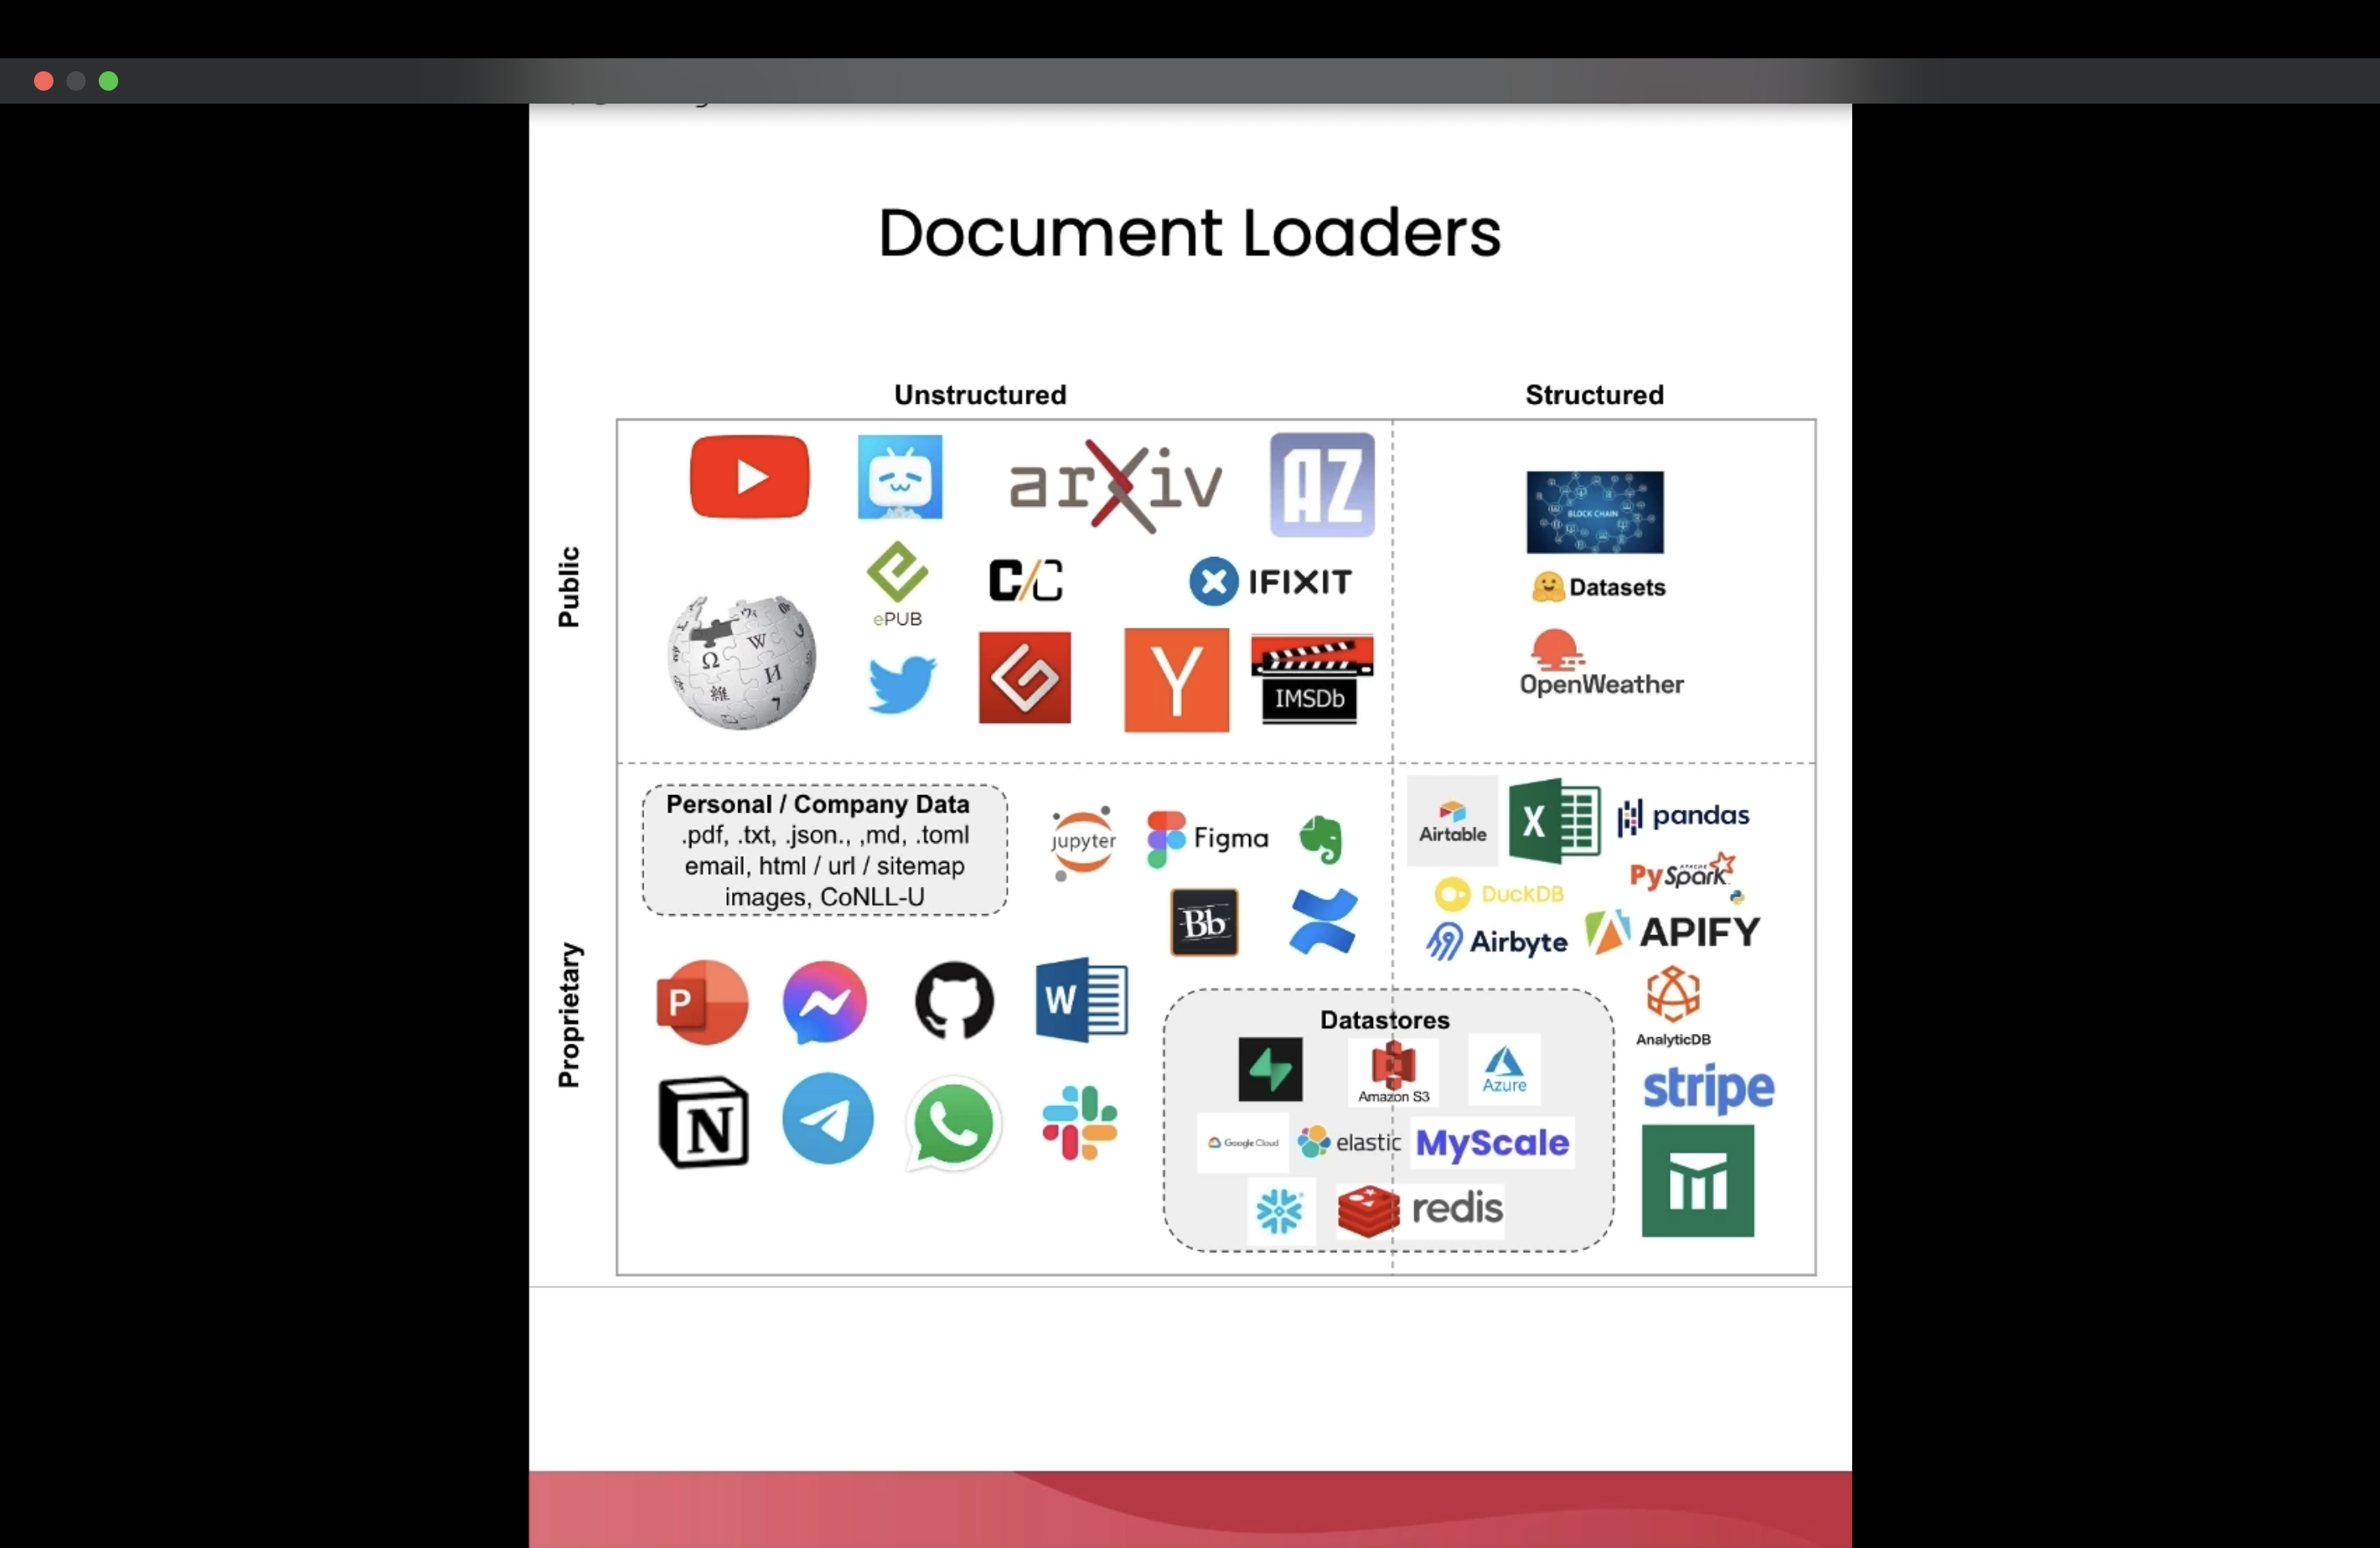

## Retrieval augmented generation
 
In retrieval augmented generation (RAG), an LLM retrieves contextual documents from an external dataset as part of its execution. 

This is useful if we want to ask question about specific documents (e.g., our PDFs, a set of videos, etc). 

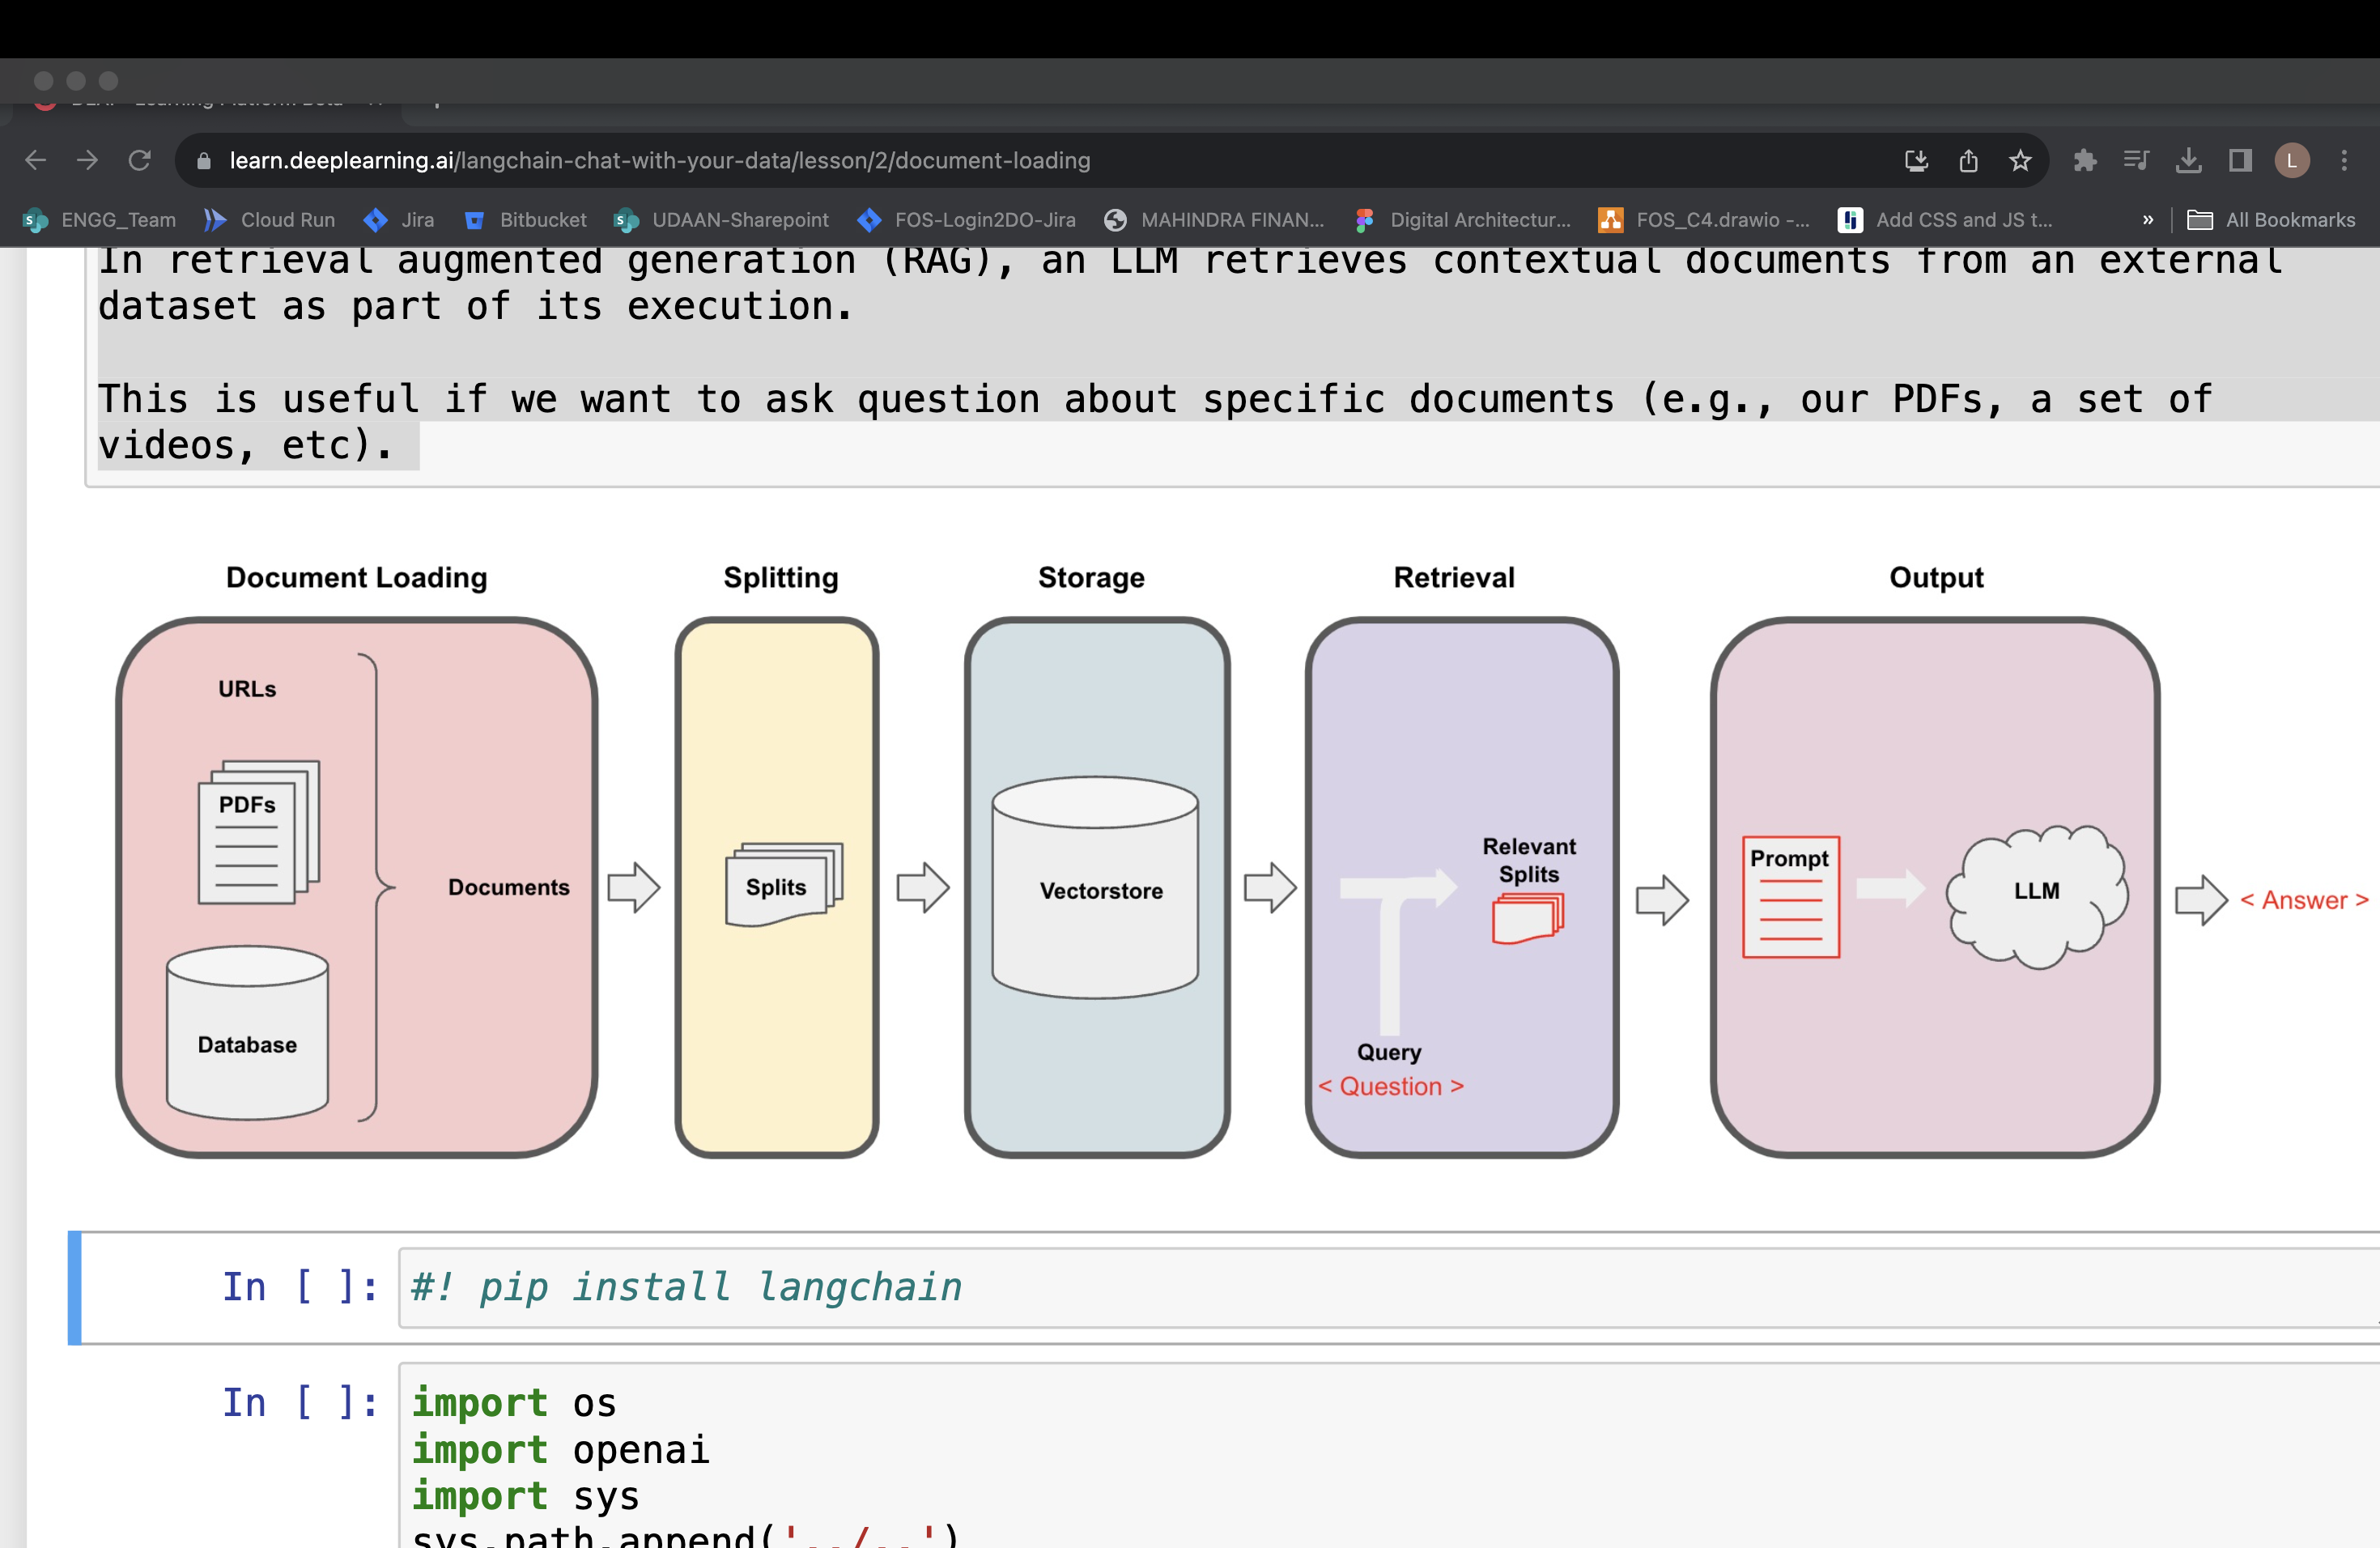

In [ ]:
import os
import openai
import sys
sys.path.append('../..')

from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv()) # read local .env file

openai.api_key  = os.environ['OPENAI_API_KEY']

Document Loader - PDF

In [2]:
## pip install pypdf 
from langchain.document_loaders import PyPDFLoader
loader = PyPDFLoader("docs/cs229_lectures/MachineLearning-Lecture01.pdf")
pages = loader.load()
len(pages)

/Users/mfho-27019739/Desktop/AIML/Github/LLM/.venv/lib/python3.9/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


22

In [3]:
page = pages[0]
print(page.page_content[0:500])

MachineLearning-Lecture01  
Instructor (Andrew Ng):  Okay. Good morning. Welcome to CS229, the machine 
learning class. So what I wanna do today is ju st spend a little time going over the logistics 
of the class, and then we'll start to  talk a bit about machine learning.  
By way of introduction, my name's  Andrew Ng and I'll be instru ctor for this class. And so 
I personally work in machine learning, and I' ve worked on it for about 15 years now, and 
I actually think that machine learning i


In [4]:
page.metadata

{'source': 'docs/cs229_lectures/MachineLearning-Lecture01.pdf', 'page': 0}

Document Loader - Youtube 

In [ ]:
# ! pip install yt_dlp
# ! pip install pydub

from langchain.document_loaders.generic import GenericLoader
## OPEN AI Whisper - Speech to Text Model [To convert youtube audio into text format]
from langchain.document_loaders.parsers import OpenAIWhisperParser
## YoutubeAudioLoader - Loads Audio File from youtube video 
from langchain.document_loaders.blob_loaders.youtube_audio import YoutubeAudioLoader

url="https://www.youtube.com/watch?v=jGwO_UgTS7I --add-header 'user-agent:Mozilla/5.0'"
save_dir="docs/youtube/"
loader = GenericLoader(
    YoutubeAudioLoader([url],save_dir),
    OpenAIWhisperParser()
)
docs = loader.load()

docs[0].page_content[0:500]

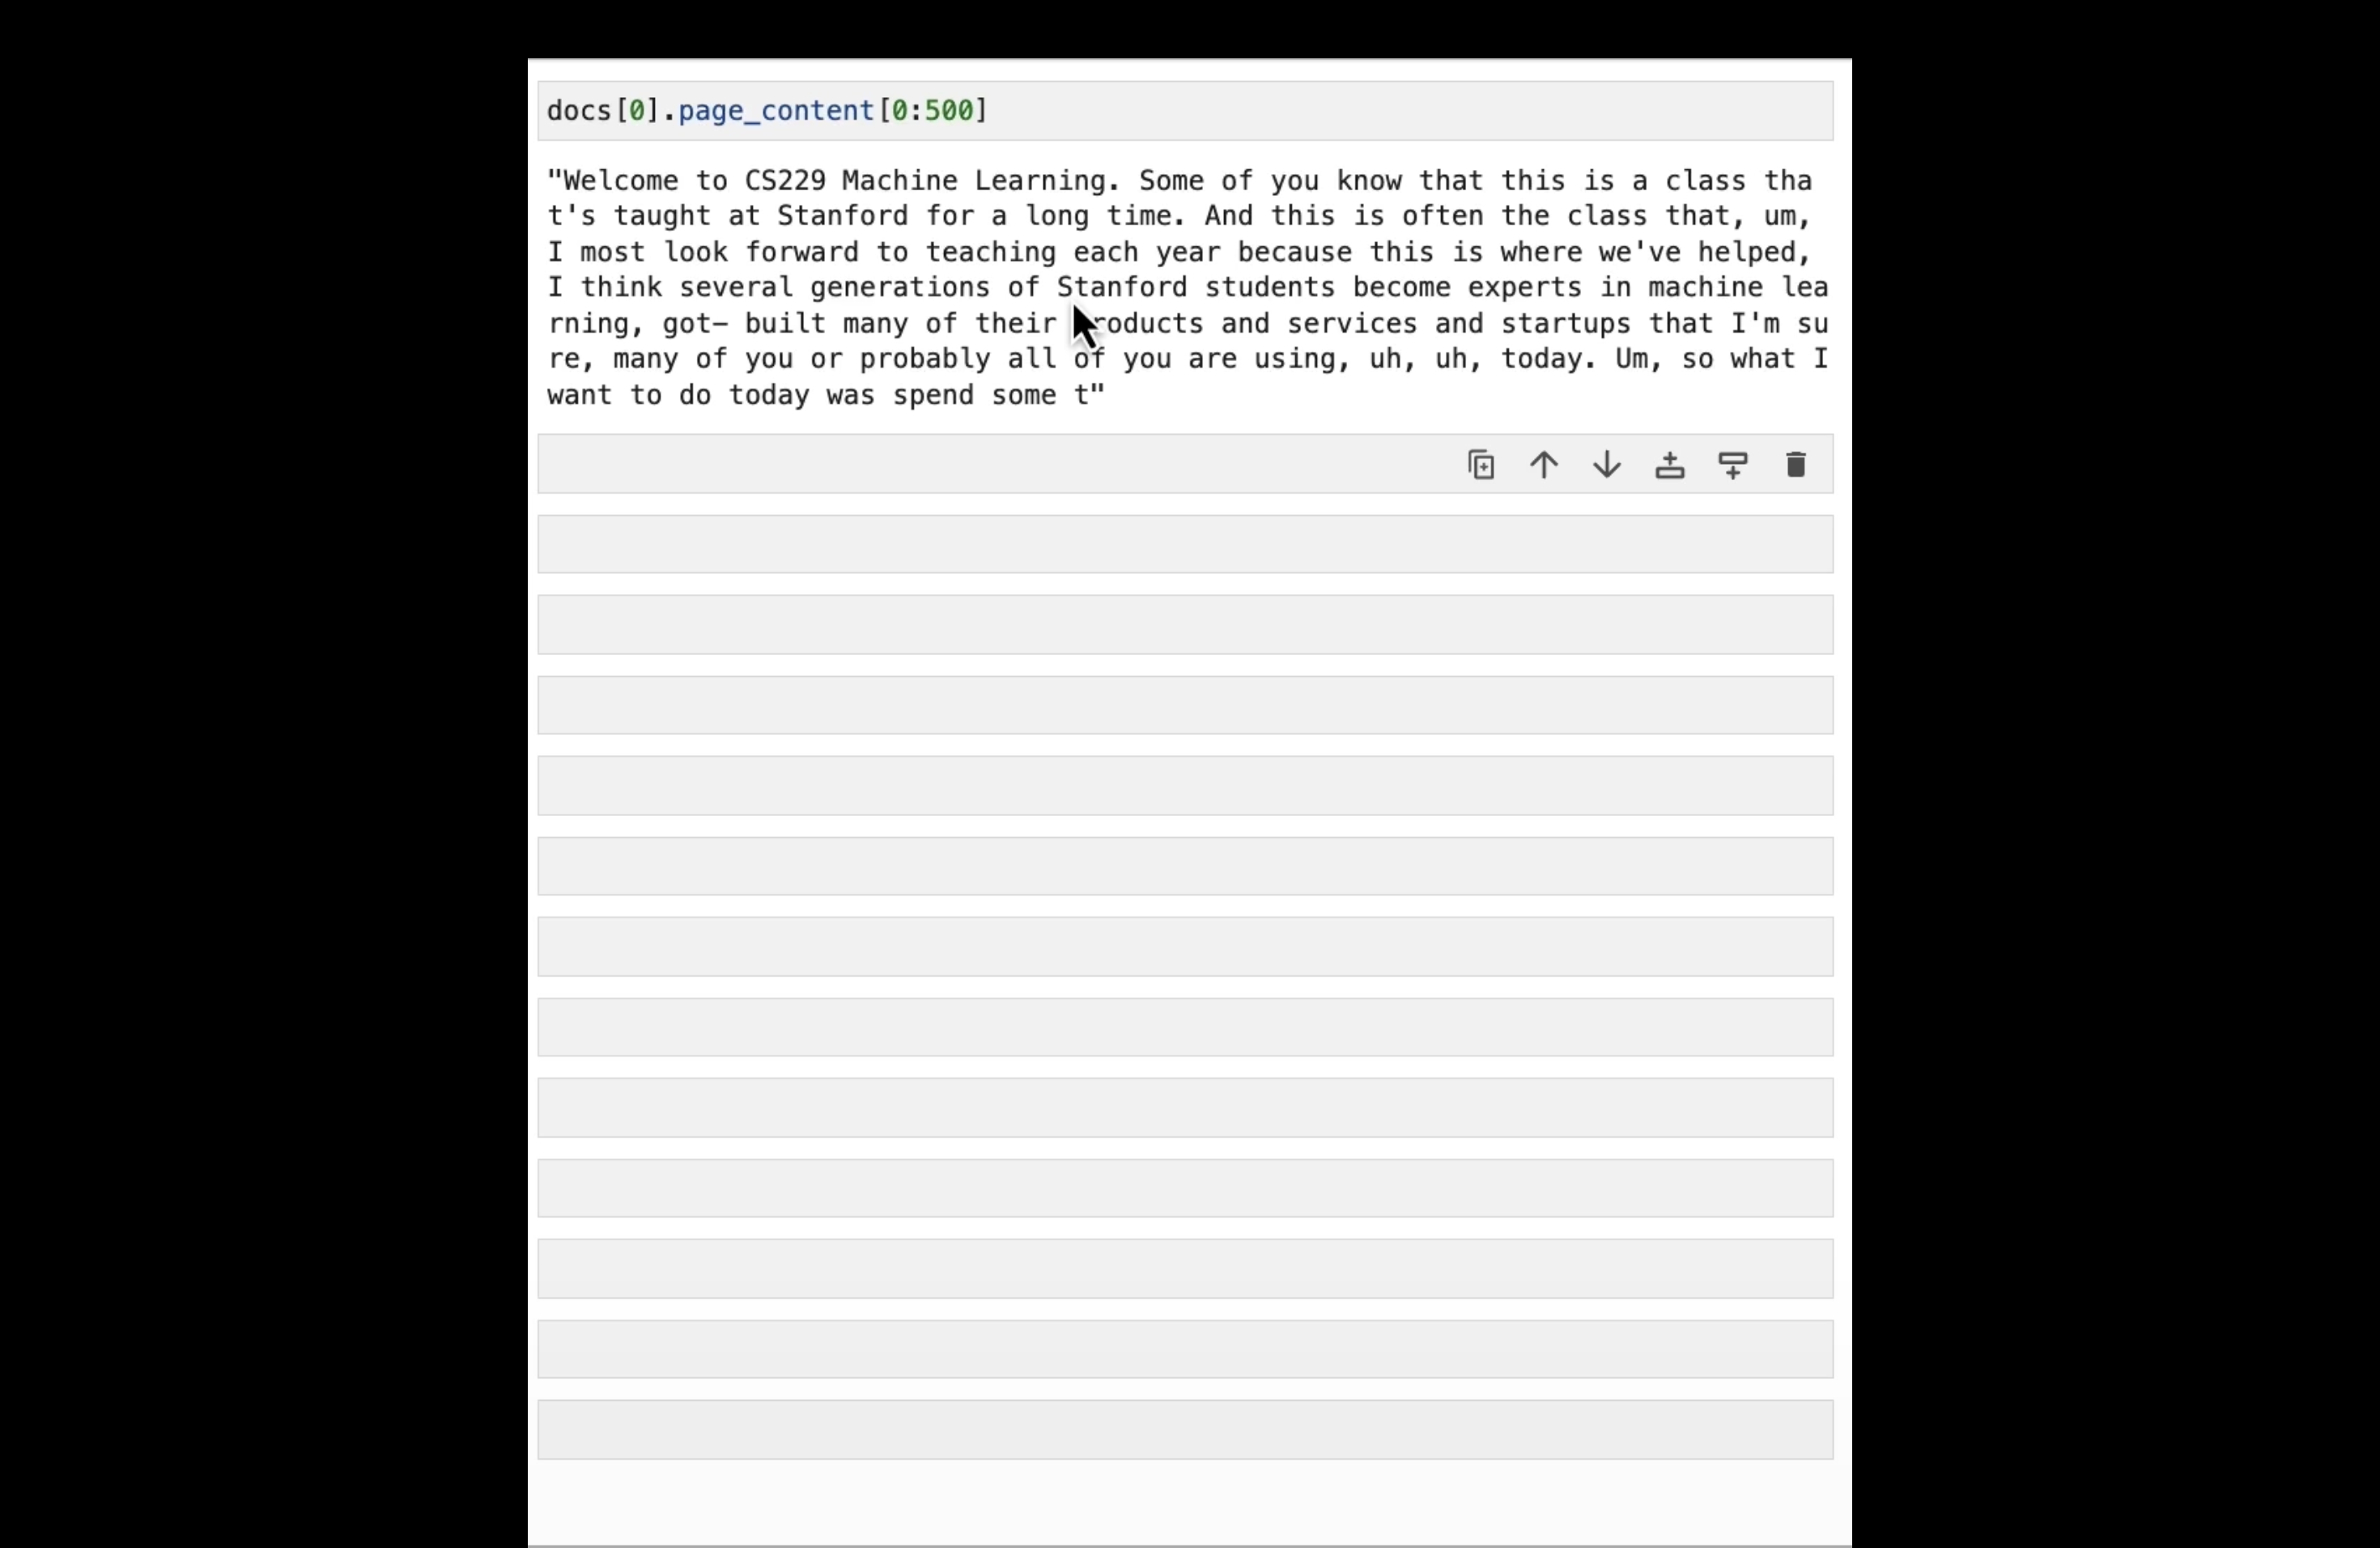

#### URLs

In [10]:
from langchain.document_loaders import WebBaseLoader

loader = WebBaseLoader("https://www.techtarget.com/whatis/definition/large-language-model-LLM")
docs = loader.load()
print(docs[0].page_content[:500])






What are Large Language Models? | Definition from TechTarget























































WhatIs.com










Search Thousands of Tech Definitions






			Browse Definitions
		:

A
B
C
D
E
F
G
H
I
J
K
L
M
N
O
P
Q
R
S
T
U
V
W
X
Y
Z
#





Login
Register




Techtarget Network
Tech Accelerator
Webinars
2023 IT Salary Survey Results



RSS







WhatIs.com







Browse Definitions

					Artificial intelligence










									Data analytics and AI

View All






### Notion

Follow steps [here](https://python.langchain.com/docs/modules/data_connection/document_loaders/integrations/notion) for an example Notion site such as [this one](https://yolospace.notion.site/Blendle-s-Employee-Handbook-e31bff7da17346ee99f531087d8b133f):

* Duplicate the page into your own Notion space and export as `Markdown / CSV`.
* Unzip it and save it as a folder that contains the markdown file for the Notion page.

In [ ]:
from langchain.document_loaders import NotionDirectoryLoader
loader = NotionDirectoryLoader("docs/Notion_DB")
docs = loader.load()
print(docs[0].page_content[0:200])

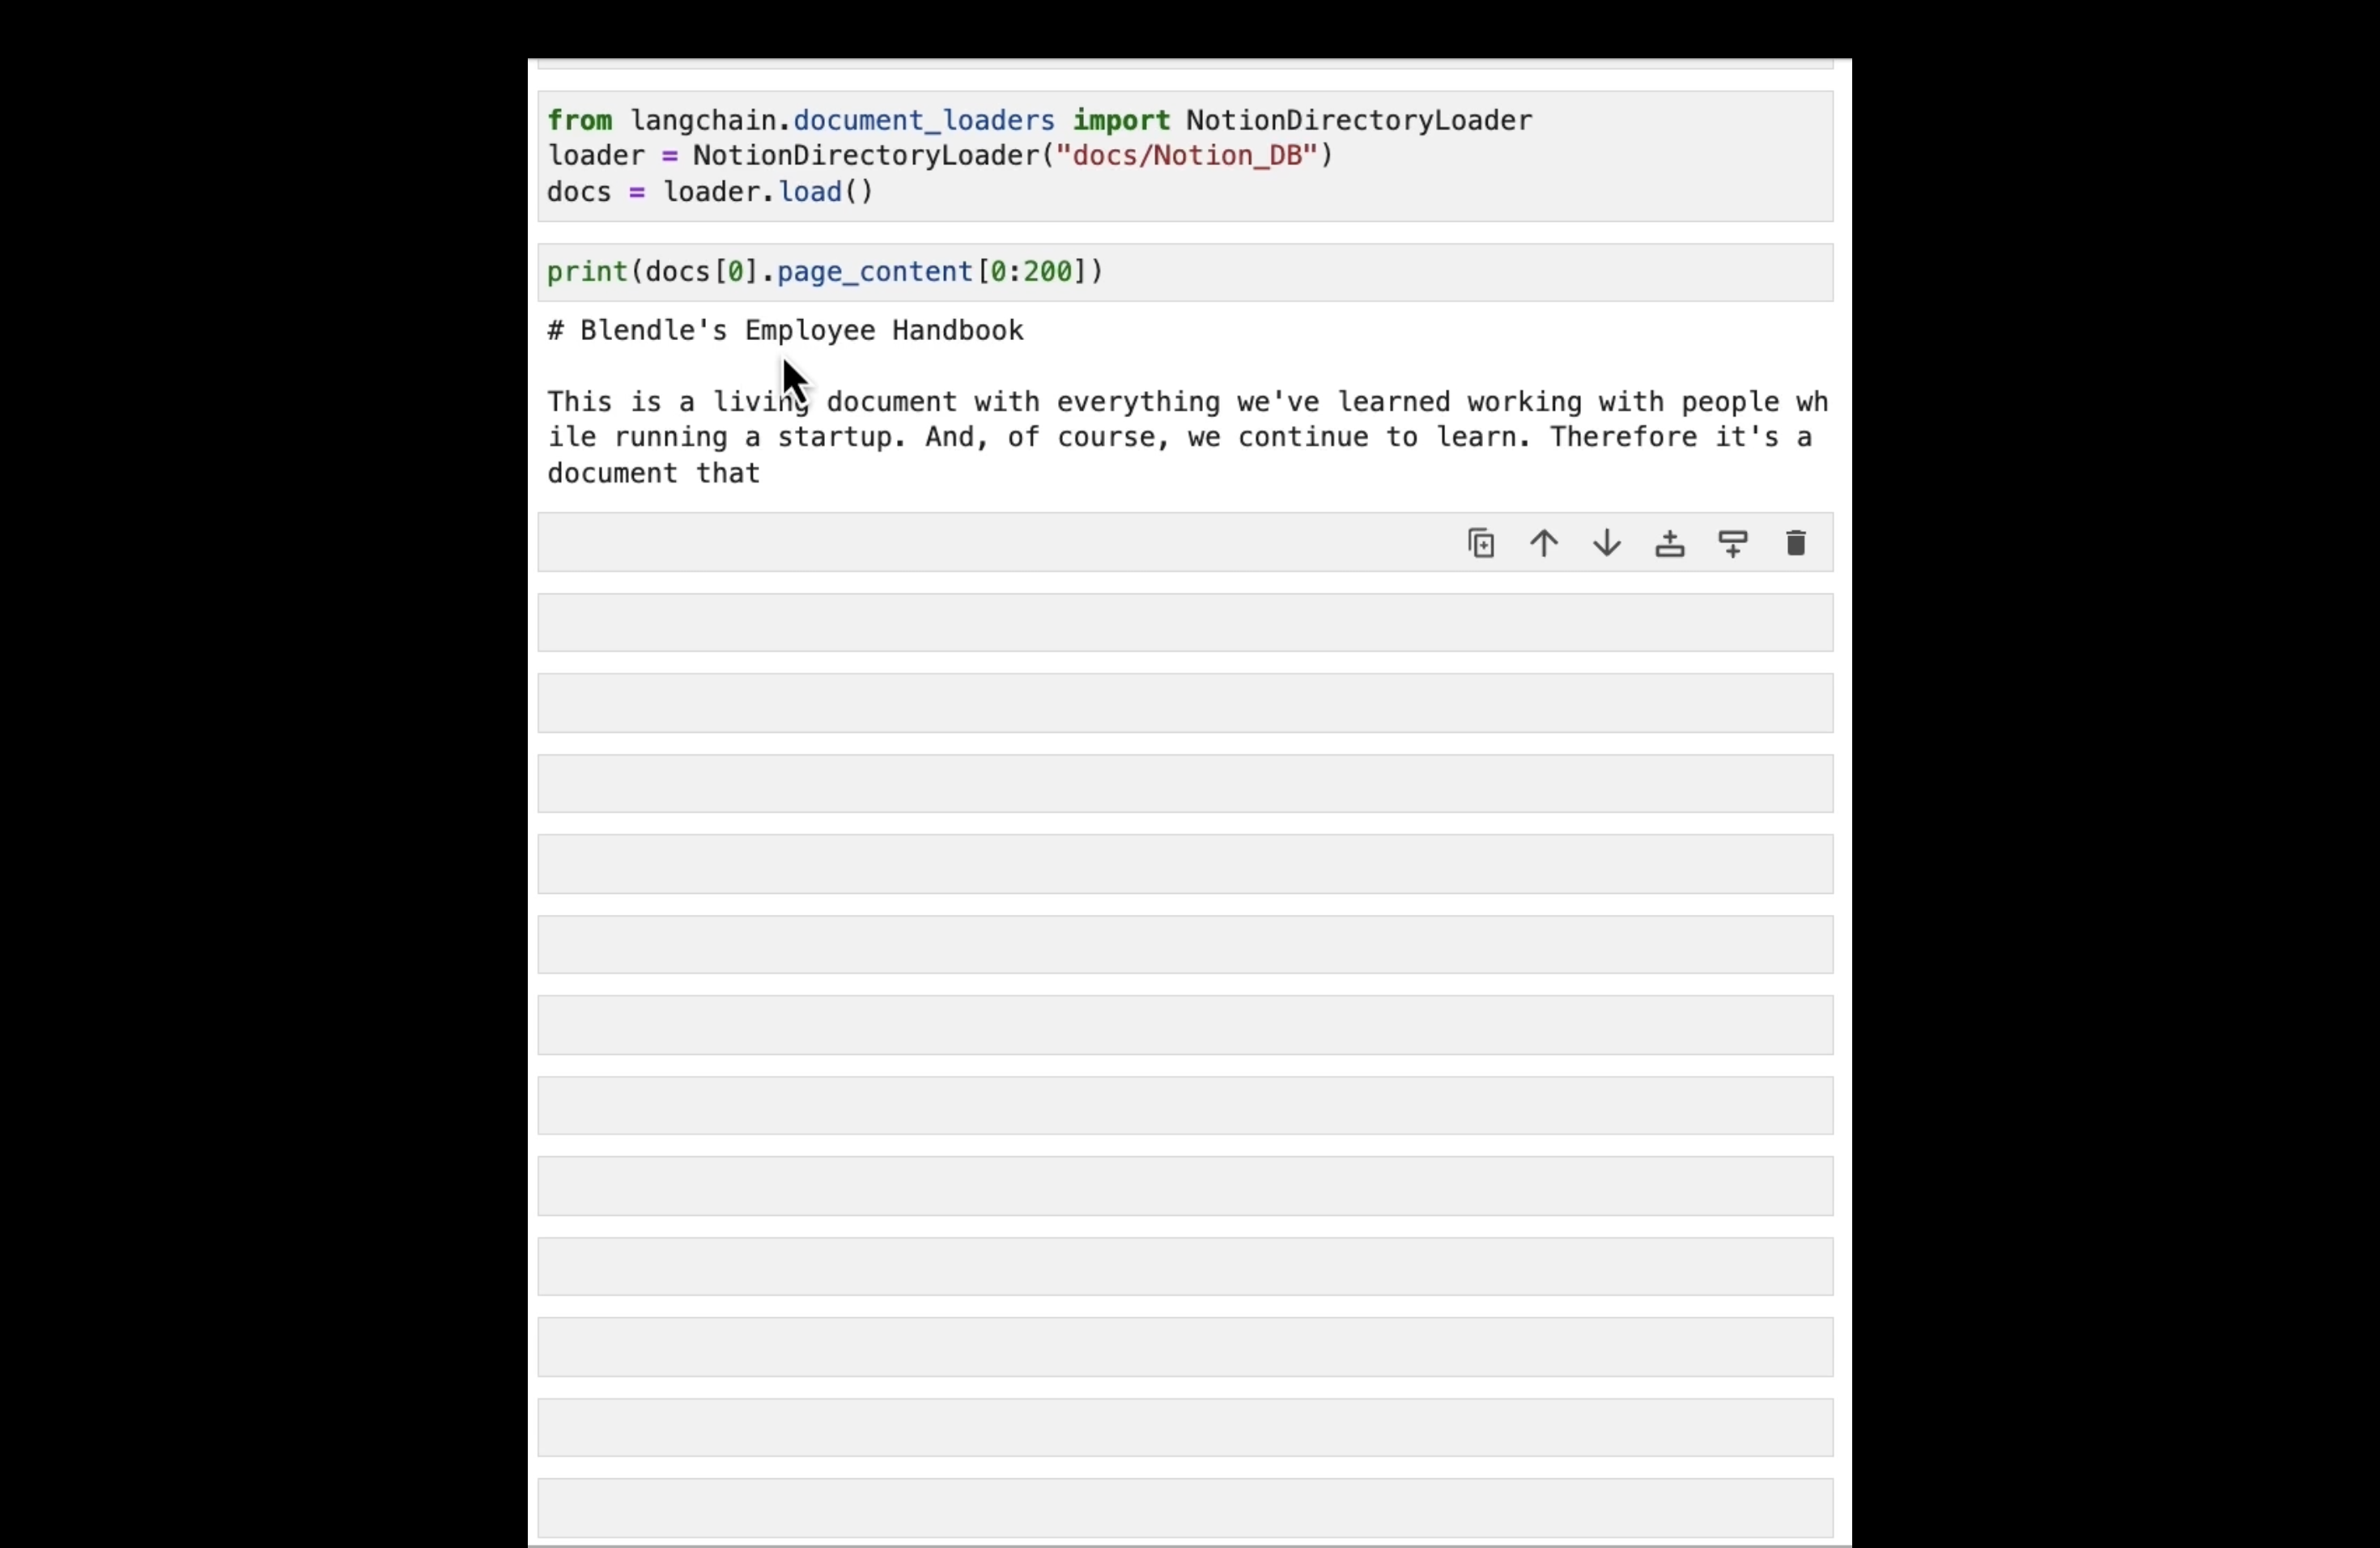